<a href="https://colab.research.google.com/github/rahulkashyap14298/about-us/blob/master/notebook3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this model we will be doing prediction on our test  data

First we will be importing the required library and mounting the google drive


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
img_counter=[]
img_counter.append(10)
import os

In [ ]:
my_dir="/content/drive/My Drive/electronic-research/electronic-recognition"

NOw we will be uploading the export.pkl file on kora drive and downloading the file using !wget command

In [ ]:
!pip install -U kora
from kora.drive import upload_public
finalurl = upload_public(my_dir+"/export.pkl")

In [ ]:
finalurl

'https://drive.google.com/uc?id=1wb7A6AU__tDlaDtvocQEAR8XTgW1xqV2'

In [ ]:
!wget -O "export.pkl" "https://drive.google.com/uc?id=1wb7A6AU__tDlaDtvocQEAR8XTgW1xqV2"

--2020-07-30 18:11:23--  https://drive.google.com/uc?id=1wb7A6AU__tDlaDtvocQEAR8XTgW1xqV2
Resolving drive.google.com (drive.google.com)... 74.125.142.101, 74.125.142.139, 74.125.142.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-5g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/939ntobk27ftk01aigd8mh5bjsvinrbq/1596132675000/09380682819649447664/*/1wb7A6AU__tDlaDtvocQEAR8XTgW1xqV2 [following]
--2020-07-30 18:11:24--  https://doc-0s-5g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/939ntobk27ftk01aigd8mh5bjsvinrbq/1596132675000/09380682819649447664/*/1wb7A6AU__tDlaDtvocQEAR8XTgW1xqV2
Resolving doc-0s-5g-docs.googleusercontent.com (doc-0s-5g-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-0s-5g-docs.googleusercontent.com (doc-0s-5g-docs.googleusercontent.com)|74.125

Now we will be setting the path of export.pkl in path variable which contains the things our model has learned by training. 

Now passing the path variable to the load_learner variable.

In [ ]:
path="/content"
predictor = load_learner(path)

Defining the my_predictor function for  testing our model on test data which is located in testdata folder.

In [ ]:
def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class

In [ ]:
my_image="/content/drive/My Drive/testdata"

listing all the images in our test data. and printing them

In [ ]:
all_test_images=os.listdir(my_image)

In [ ]:
print(all_test_images)

['00000518.jpg', '00000505.jpg', '00000459.jpg', '00000540.jpg', '00000433.jpg', '00000447.jpg', '00000486.jpg', '00000507.jpg', '00000426.jpg', '00000522.jpg', '00000504.jpg', '00000445.jpg', '00000473.jpg', '00000474.jpg', '00000506.jpg', '00000480.jpg', '00000425.jpg', '00000517.jpg', '00000472.jpg', '00000510.jpg', '00000531.jpg', '00000462.jpg', '00000481.jpg', '00000432.jpg', '00000461.jpg', '00000520.jpg', '00000484.jpg', '00000497.jpg', '00000496.jpg', '00000530.jpg', '00000460.jpg', '00000434.jpg', '00000448.jpg', '00000533.jpg', '00000519.jpg', '00000532.jpg', '00000446.jpg', '00000485.jpg', '00000493.jpg', '00000534.jpg', '00000541.jpg', '00000471.jpg', '00000528.jpg', '00000495.jpg', '00000469.jpg', '00000529.jpg', '00000542.jpg', '00000483.jpg', '00000508.jpg', '00000516.jpg', '00000470.jpg', '00000498.jpg', '00000521.jpg', '00000509.jpg', '00000444.jpg', '00000482.jpg', '00000494.jpg', '00000492.jpg', '00000456.jpg', '00000468.jpg', '00000458.jpg', '00000449.jpg', '000005

This code test our image on particular image and image.show() fun return the output which we have passed to the my_predictor function .

fan


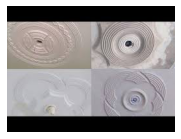

In [ ]:
idx=45
print(my_predictor("/content/drive/My Drive/testdata/"+all_test_images[idx]))
img = open_image("/content/drive/My Drive/testdata/"+all_test_images[idx])
img.show()

NOW we will be importing the cv2 library for making our final output video .


In [ ]:
import cv2
test_files=os.listdir(my_image)
os.makedirs("test_result",exist_ok=True)
i=0
for test_file in test_files:
  img=cv2.imread(my_image+"/"+test_file)
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  font = cv2.FONT_HERSHEY_SIMPLEX 
  i+=1
  org = (0, 50) 
  fontScale = 2
  color = (255, 0, 0) 
  thickness = 4
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)

In [ ]:
%cd "test_result"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' -s 1920x1080  \-c:v libx264 -r 1 -pix_fmt yuv420p ../my_final_output.mp4
%cd ..

/content/test_result
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 -

uploading the url of final output video on kora and downlaoding it

In [ ]:
url = upload_public('my_final_output.mp4')

In [ ]:
url


'https://drive.google.com/uc?id=1BQIZWHxnWXnpf3QCgv7pBeRVNZbIkZbP'

In [ ]:

from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")

In [ ]:
!wget -O "fan.jpg" "https://assetscdn1.paytm.com/images/catalog/product/H/HO/HOMCROMPTON-AURSAI-752016279EC47/1562564326647_0.jpg"

--2020-07-30 18:36:11--  https://assetscdn1.paytm.com/images/catalog/product/H/HO/HOMCROMPTON-AURSAI-752016279EC47/1562564326647_0.jpg
Resolving assetscdn1.paytm.com (assetscdn1.paytm.com)... 104.92.253.152
Connecting to assetscdn1.paytm.com (assetscdn1.paytm.com)|104.92.253.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40237 (39K) [image/jpeg]
Saving to: ‘fan.jpg’

fan.jpg             100%[===================>]  39.29K  --.-KB/s    in 0.007s  

2020-07-30 18:36:11 (5.71 MB/s) - ‘fan.jpg’ saved [40237/40237]



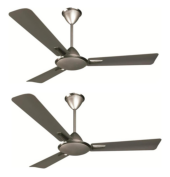

In [ ]:
fan=open_image("fan.jpg")
fan.size
fan.show()

In [ ]:
import shutil, os
files = ['/content/drive/My Drive/check.jpeg']
for f in files:
    shutil.move(f, '/content')

Testing our model on real  image clicked by mobile phone and predicting the image output.

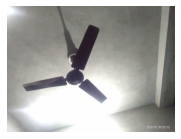

In [ ]:
ans=open_image("check.jpeg")
ans.size
ans.show()

In [ ]:
print(my_predictor("/content/check.jpeg"))

fan
